In [19]:
# Import necessary libraries
import urllib.request
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as confusion_matrix



# Model Implementation

Dataset Details:
This dataset captures patterns and behaviours that indicate fraud (victims) or potential fraud reported from 2021 to 2025. The data is composed of several features designed to reflect the transactional patterns, such as geographical location, gender, age range, complaint type, solicitation method, fraud categories and dollar loss relative to the user.

*   Number ID: *serial number of reported event.*
*   Date received: *The date it was reported.*
*   Complaint Received Type: *How wa sthe complaint made to the government fraud agencies.*
*   Country: This includes multiple countries where Canadians reported from. **Our focus is on Canada only,** hence we filtered this out in our query.
*   Province: *This is the Province in Canada where it was reported from.*
*   Fraud and Cybercrime Thematic Categories: *These are the variousfraud categorieslike Merchandise, Counterfei Merchandise, Vendor fraud and others.*
*   Solicitation method: *such as text message, email, direct call, internet -social network. *
*   Gender: *Male, Female, Prefer not to say, Not Available*
*   Language: *English or French*
*   Victim Age range: *the age range of victims of fraud or attempedfraud (no fraud).*
*   Complaint Type: *Victim - Fraud (1) and Attempt & Other - No Fraud (0).*
*   Number of Victims: *Victimis reprsented by 1 and all others as 0.*
*   Dollar Loss: *The financial loss implication of fraud as victims*


**Objective of Case study** [2 parts]:
- Part 1 - Train the model to know when there is Fraud or No Fraud. No Fraud includes an attempt, other or unknown. Aas code enforcers, we tookan asusmption of these 3 categories as 'No Fraud'. Include Optimization of the model.

- **Additional:** Part 2 in app.py file- Train the model (restricting our cleaned data to only victims/ fraud cases)to know when there is financial loss in a fraud case and no financial loss. Included to build an interactive dashboard with users. No optimization included.


# Save database and use SQLlite

In [5]:
#Delete this section and replace with SQLIte

import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the CSV (replace 'filename.csv' with your actual filename)
df = pd.read_csv('cleaned_data.csv')

# Show the first few rows
df.head()


Saving cleaned_data.csv to cleaned_data.csv


,Number ID,Date Received,Complaint Received Type,Country,Province/State,Fraud and Cybercrime Thematic Categories,Solicitation Method,Gender,Language of Correspondence,Victim Age Range,Complaint Type,Number of Victims,Dollar Loss
0,1,2021-01-02,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Not Available,Not Available,'Not Available / non disponible,Attempt,0,0.00
1,2,2021-01-02,CAFC Website,Not Specified,Not Specified,Merchandise,Internet,Not Available,Not Available,'Not Available / non disponible,Victim,1,1000.00
2,3,2021-01-02,CAFC Website,Canada,Quebec,Identity Fraud,Other/unknown,Male,French,'40 - 49,Victim,1,0.00
3,4,2021-01-02,CAFC Website,Canada,Saskatchewan,Phishing,Email,Male,English,'30 - 39,Victim,1,0.00
4,5,2021-01-02,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Male,Not Available,'60 - 69,Victim,1,222.73


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327560 entries, 0 to 327559
Data columns (total 13 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Number ID                                 327560 non-null  int64 
 1   Date Received                             327560 non-null  object
 2   Complaint Received Type                   327560 non-null  int64 
 3   Country                                   327560 non-null  int64 
 4   Province/State                            327560 non-null  int64 
 5   Fraud and Cybercrime Thematic Categories  327560 non-null  int64 
 6   Solicitation Method                       327560 non-null  int64 
 7   Gender                                    327560 non-null  int64 
 8   Language of Correspondence                327560 non-null  int64 
 9   Victim Age Range                          327560 non-null  object
 10  Complaint Type                  

# Prep the data - data cleaning

# Training the Machine on Part 1 - Fraud vs. No Fraud

Stakeholders:
1. Law Enforcement & Government: Identify high-risk fraud zones and optimize resource allocation.
2. Financial Institutions: Strengthen fraud detection and enhance consumer protection.


In [6]:
# Convert categorical variables to numerical format using Label Encoding
categorical_columns = ["Complaint Received Type", "Country", "Province/State", "Fraud and Cybercrime Thematic Categories", "Solicitation Method", "Gender", "Language of Correspondence","Dollar Loss"]
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [8]:
# Feature Selection
X = df.drop(["Number ID","Complaint Type", "Number of Victims"], axis=1)
y = df["Number of Victims"].apply(lambda x: 1 if x > 0 else 0)

In [37]:
# Normalize Data
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['number'])  # Select only numeric columns
X_scaled = scaler.fit_transform(X_numeric)


# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Implementation: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")


Model Accuracy: 0.88277


In [ ]:
# Save Model Evaluation Data to CSV for Optimization Tracking
evaluation_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
evaluation_results.to_csv("model_evaluation.csv", index=False)

# Print Performance Metrics
print(classification_report(y_test, y_pred))

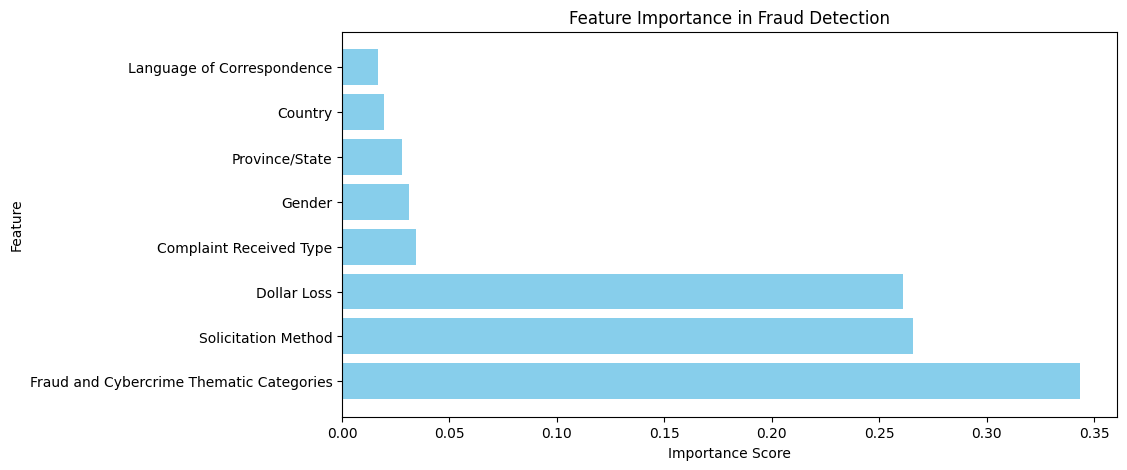

In [ ]:
# Get feature importance from the trained model
feature_importance = model.feature_importances_

# Convert to DataFrame for easy plotting
feature_names = X_numeric.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Fraud Detection")
plt.show()

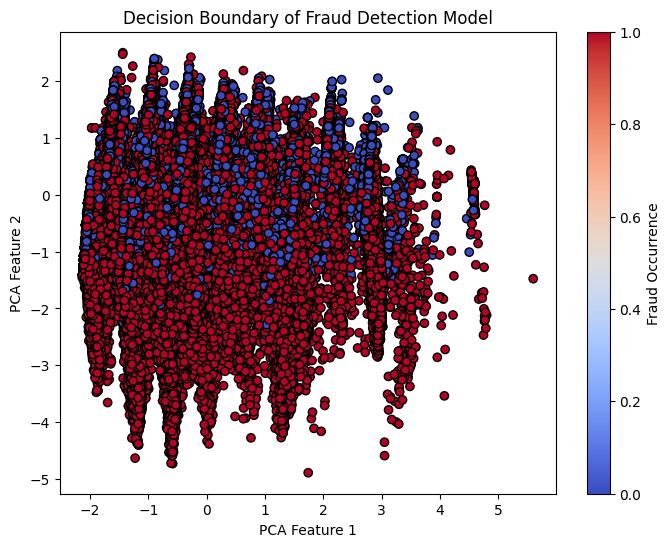

In [ ]:
# Reduce feature dimensions using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot with fraud cases color-coded
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", edgecolors='k')
plt.title("Decision Boundary of Fraud Detection Model")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.colorbar(label="Fraud Occurrence")
plt.show()

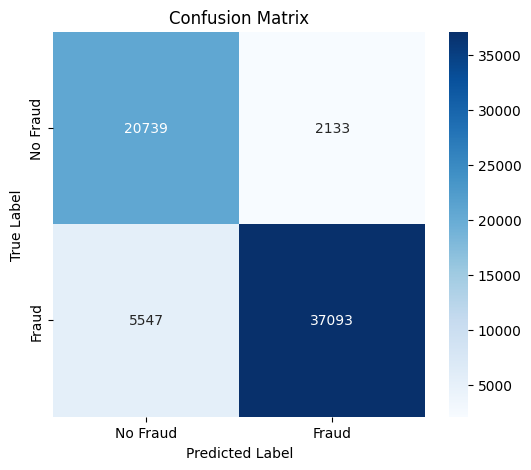

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optimization of Part 1 - Fraud vs. No Fraud

In [13]:
# Create model and fit
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [14]:
# Predict
knn_testing_prediction = knn_model.predict(X_test)
knn_testing_prediction

array([0, 0, 1, ..., 0, 0, 1])

In [36]:
knn_accuracy_score = accuracy_score(y_test, knn_testing_prediction)

print(f"The Accuracy score of KNN model at K=5 is : {knn_accuracy_score:.5f}")

The Accuracy score of KNN model at K=5 is : 0.86485


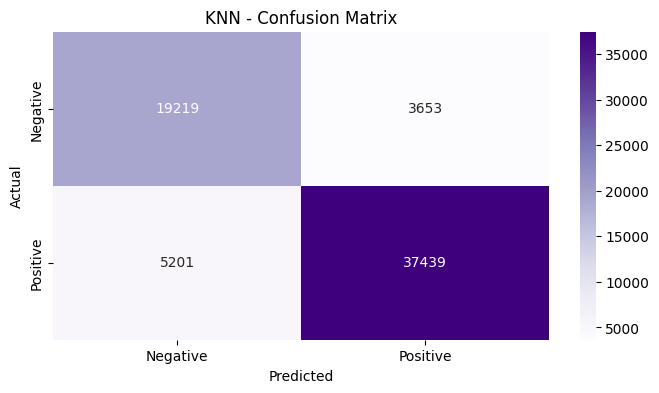

In [21]:
# Create confusion matrix
knn_confustion_matrix_plot = confusion_matrix(y_test, knn_testing_prediction)
plt.figure(figsize=(8, 4))
sns.heatmap(
    knn_confustion_matrix_plot,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"],
)
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


k: 1, Train/Test Score & Accuracy: 0.86802/0.84501, 0.84501
k: 3, Train/Test Score & Accuracy: 0.87710/0.86149, 0.86149
k: 5, Train/Test Score & Accuracy: 0.87914/0.86485, 0.86485
k: 7, Train/Test Score & Accuracy: 0.88026/0.86741, 0.86741
k: 9, Train/Test Score & Accuracy: 0.88114/0.86970, 0.86970
k: 11, Train/Test Score & Accuracy: 0.88087/0.86996, 0.86996
k: 13, Train/Test Score & Accuracy: 0.88011/0.87033, 0.87033
k: 15, Train/Test Score & Accuracy: 0.87905/0.87034, 0.87034
k: 17, Train/Test Score & Accuracy: 0.87845/0.86999, 0.86999
k: 19, Train/Test Score & Accuracy: 0.87772/0.86978, 0.86978


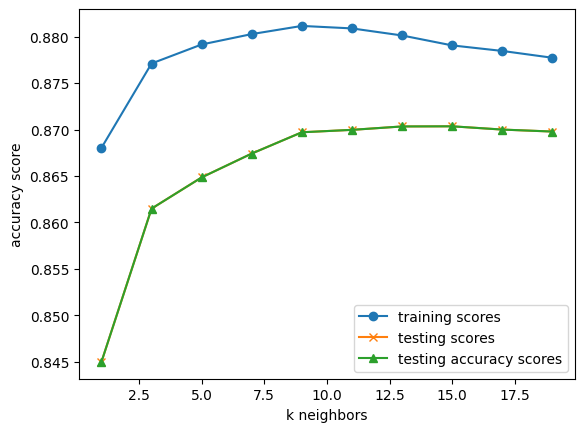

In [24]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
acc_score = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    test_predict = knn.predict(X_test)
    test_accuracy_score = accuracy_score(y_test, test_predict)
    train_scores.append(train_score)
    test_scores.append(test_score)
    acc_score.append(test_accuracy_score)
    print(
        f"k: {k}, Train/Test Score & Accuracy: {train_score:.5f}/{test_score:.5f}, {test_accuracy_score:.5f}"
    )

# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker="o", label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.plot(range(1, 20, 2), acc_score, marker="^", label="testing accuracy scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [25]:
# Optimized K
knn_optimized = KNeighborsClassifier(n_neighbors=15)
knn_optimized_model = knn_optimized.fit(X_train, y_train)
knn_optimized_model



KNeighborsClassifier(n_neighbors=15)

In [38]:
# Predict using the final trained model (after finding best K)
final_preds = knn_optimized.predict(X_test)

knn_opt_accuracy_score = accuracy_score(y_test, final_preds)

print(f"The Accuracy score of KNN model at K=15 is : {knn_opt_accuracy_score:.5f}")


The Accuracy score of KNN model at K=15 is : 0.87034


In [39]:
# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, final_preds))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82     22872
           1       0.93      0.87      0.90     42640

    accuracy                           0.87     65512
   macro avg       0.85      0.87      0.86     65512
weighted avg       0.88      0.87      0.87     65512



# Summary
### Accuracy of 2 models and Optimization

|                          | Random Forest Classifier | K Neighbors Classifier (K=5) | Optimized K Neighbors Classifier (K=13) |
|--------------------------|--------------------------|------------------------------|-------------------------------|
| **Accuracy Score**       | 0.88277                  | 0.86485                     | 0.87034                       |


# Additional: Training the Machine on Part 2 - Fraud with Financial loss vs. No financial Loss
Note - This is an additional layer to the assignment that the Code Enforcers thought to add.

Objetive - This will be used to create an interactive dashboard for end users to predict fraudulent transactions that may lead to financial loss. **This will be in an app.py file. Please refer to the file.**

Dataset - Cleaned data that has victims only: victim_loss_data
Stakeholders:

**Victims/ General Public** -
1. Receive early warnings if their situation matches a known fraud pattern.
2. May be advised not to proceed with suspicious transactions.
3. Gain awareness and education through the interface (e.g. “This fraud is common in your region.”).

**Financial Institutions** -
1. Alert clients or freeze suspicious transactions based on user input.
2. Gain access to user-reported fraud risk before a financial transaction happens.